In [31]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [32]:
wine.info()
#non-null -> 누락값 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [33]:
wine.describe()
#n수,평균, 표준편차, 최소, 1사분위수, 중간값, 3사분위수, 최대 이렇게 나옴

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [34]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [35]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)
#test_size=0.2는 전체 데이터의 20%를 ‘시험용 세트(테스트셋)’으로 떼어 두겠다는 뜻

In [36]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
#로지스틱 회귀 훈련해봄!

0.7808350971714451
0.7776923076923077


In [39]:
print(lr.coef_, lr.intercept_)
#alcohol, sugar, ph a값, z값 추출

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


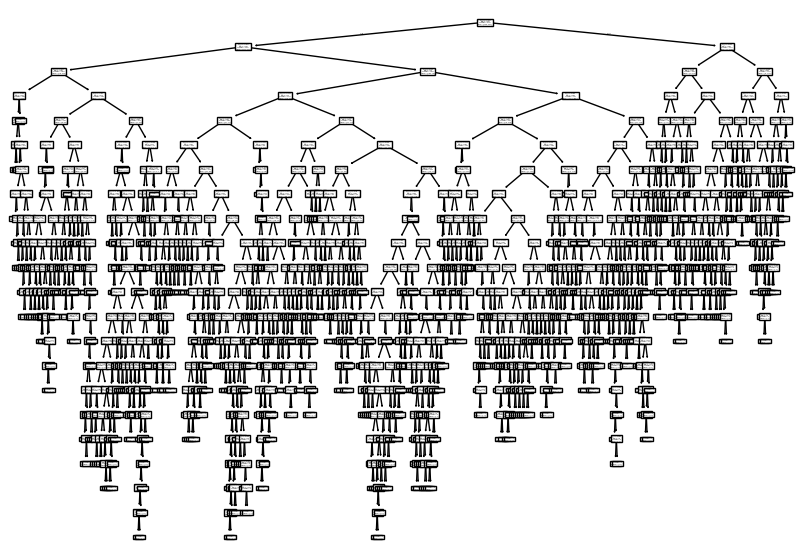

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
#figsize=(10,7)은 그림의 가로 10인치, 세로 7인치로 도화지 크기를 정하는 옵션
plot_tree(dt)
plt.show()

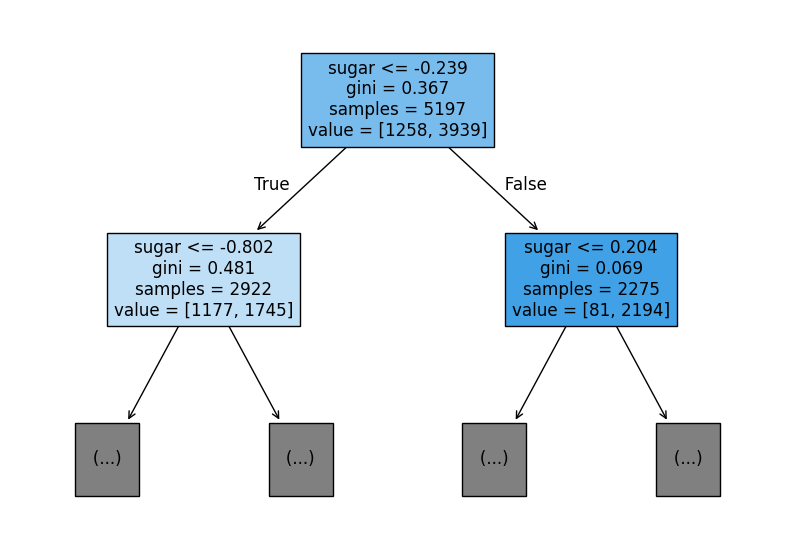

In [42]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True,
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

criterion은 트리가 “어떻게 나눌지” 결정할 때 쓰는 분할 기준
gini는 그 기준 중 하나로 클래스가 얼마나 뒤섞였는지(불순도)를 숫자로 측정
트리는 분할 후 자식 노드들의 gini 불순도를 최대한 낮추는 방향(= 더 순수하게 만드는 방향, 0으로 수렴하도록)으로 분할을 고른다.​
결정 트리 모델은 부모 노드parent node와 자식 노드child node의 불순도 차이가 가능한 크도록 진행함 = 정보이득이 최대가 되도록 나눔
DecisionTreeClassifier 클래스에서 criterion=‘entropy’를 지정하여 엔트로피 불순도를 사용할 수 있음. 엔트로피 불순도도 노드의 클래스 비율을 사용하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱합니다. 
기본 불순도는 gini(1-(음성제곱-양성제곱)), 엔트로피 불순도(log2) 있음

In [43]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


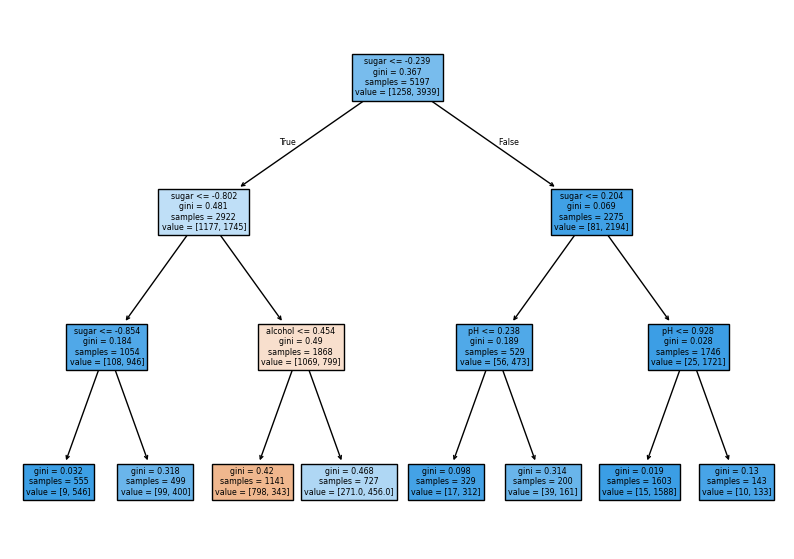

In [44]:
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [45]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
#preprocessiong(standardscaler) 과정 없는 샘플

0.8454877814123533
0.8415384615384616


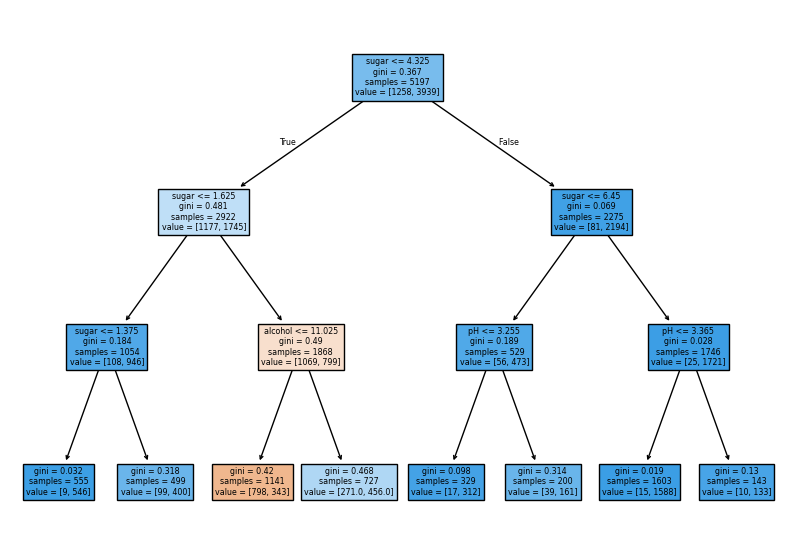

In [46]:
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [47]:
print(dt.feature_importances_)
#'alcohol', 'sugar', 'pH' 중에서 sugar가 값이 높음(제일중요!)
#이 값을 다 더하면 1
#특성 중요도

[0.12345626 0.86862934 0.0079144 ]


검증세트 : 훈련세트에서 검증을 위한 샘플집합
교차검증 : 훈련세트를 여러 번 나눠서 여러 번 시험본 뒤, 성적을 평균 내어 모델의 진짜 실력을 더 공정하게 재는 방법이다.데이터를 k등분으로 나눈다. 매 회차마다 1등분은 검증용, 나머지 k-1등분은 학습용으로 써서 성능을 기록한다.
훈련세트를 세 부분으로 나눠 교차검증 -> 3-폴드 교차검증
k-폴드 교차검증하게 되면 데이터의 80~90%까지 훈련에 사용할 수 있음
안정된 점수 계산 가능

In [48]:
from sklearn.model_selection import cross_validate
scores=cross_validate(dt, train_input, train_target)
print(scores)
#fit_time, score_time, test_score 키를 가진 딕셔너리 
#기본적으로 5-폴드 교차검증

{'fit_time': array([0.00703788, 0.00661373, 0.00585341, 0.00382423, 0.00294948]), 'score_time': array([0.00297952, 0.00244856, 0.00131702, 0.00124764, 0.00114965]), 'test_score': array([0.84230769, 0.83365385, 0.84504331, 0.8373436 , 0.8479307 ])}


In [ ]:
import numpy as np
print(np.mean(scores['test_score']))
#cross_validate는 샘플을 섞지 않는다. 섞으려면 splitter 쓴다
#kfold 분할기 -> stratifiedkfold


0.8412558303102096


In [50]:
from sklearn.model_selection import StratifiedKFold
scores=cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8412558303102096


In [52]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score=cross_validate(dt,train_input, train_target, cv=splitter)
print(np.mean(score['test_score']))
#n_splits=10 10번 폴드교차검증 한다.

0.8335549132947977


하이퍼파라미터튜닝 : 사용자 지정 파라미터를 튜닝한다~
사람의 개입 없이 자동으로 튜닝?! autoML

결정트리모델에서 max_depth는 min_samples_split의 값이 바뀌면 같이 바뀜
그리드서치 : 교차검증에서 가장 좋은 점수의 매개변수 조합선택
랜덤서치 : 연속된 매개변수 값을 탐색할 때 유용, 확률분포 객체 전달


In [ ]:
from sklearn.model_selection import GridSearchCV
#하이퍼파라미터탐색+교차검증
params={'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}
#min_impurity_decrease : 노드를 분할했을 때 불순도(예: 지니, 엔트로피)가 얼마나 줄어드는지 계산하고,
# 그 감소량이 이 임계값 이상일 때만 분할을 허용하는 사전 가지치기 기준이다.
# 5개의 후보로 바꿔가며 교차검증한다
#값이 클수록 “의미 있는” 분할만 허용해 
# 트리를 작게 만들어 과적합을 줄이는 경향이 있다(보수적 성장).​

In [55]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
#n_jobs=-1 전체 cpu 다 쓴다~